In [1567]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

# Trip activity - Analysis


##### VEMO

#### Iber Ismael Piovani

#### Cargamos los datos de los viajes en un dataframe

In [1568]:
df_trips = pd.read_csv('data/trips_activity.csv')

#### Analisis previo de los datos para empezar a interpretar la conformacion de los mismos buscando nulos y valores atipicos. 

In [1569]:
# Vemos la conformacion del dataset

df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21486 entries, 0 to 21485
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21486 non-null  int64  
 1   id_week             21486 non-null  int64  
 2   id_driver           21486 non-null  int64  
 3   id_unit             21486 non-null  int64  
 4   trip_status         21486 non-null  object 
 5   trip_rev            18889 non-null  float64
 6   trip_distance       21486 non-null  float64
 7   time_on_trip        18283 non-null  float64
 8   mean_speed          18259 non-null  float64
 9   id_shift            18259 non-null  float64
 10  request_datetime    21486 non-null  object 
 11  drop_datetime       21486 non-null  object 
 12  trips_per_hour      16712 non-null  float64
 13  shift_time          19173 non-null  object 
 14  rest_days           19173 non-null  object 
 15  shift_str_datetime  21486 non-null  object 
dtypes: f

In [1570]:
df_trips.describe()

,Unnamed: 0,id_week,id_driver,id_unit,trip_rev,trip_distance,time_on_trip,mean_speed,id_shift,trips_per_hour
count,21486.000000,21486.0,21486.000000,21486.000000,18889.000000,21486.000000,18283.000000,18259.000000,18259.000000,16712.000000
mean,10742.500000,49.0,656.833845,106.434609,98.562022,10.832123,39.091735,19.981026,28106.821567,1.864612
std,6202.618278,0.0,252.931233,58.763279,63.986745,9.881230,20.839683,9.192492,8576.652177,1.176876
min,0.000000,49.0,6.000000,1.000000,-78.740000,0.000000,1.366667,0.000000,456.000000,0.171780
25%,5371.250000,49.0,506.000000,57.000000,52.590000,3.350000,24.008333,13.224229,25070.000000,1.094225
50%,10742.500000,49.0,720.000000,109.000000,85.390000,8.510000,35.100000,18.564461,31699.000000,1.582418
75%,16113.750000,49.0,862.000000,155.000000,128.480000,15.960000,49.233333,25.449924,34218.000000,2.310655
max,21485.000000,49.0,980.000000,211.000000,1626.290000,80.380000,207.483333,144.734695,35389.000000,43.902439


In [1571]:
df_trips.shape

(21486, 16)

In [1572]:
# Primero 5 filas que nos da un pantallazo muy general de los datos. 

df_trips.head()

,Unnamed: 0,id_week,id_driver,id_unit,trip_status,trip_rev,trip_distance,time_on_trip,mean_speed,id_shift,request_datetime,drop_datetime,trips_per_hour,shift_time,rest_days,shift_str_datetime
0,0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00
1,1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
2,2,49,6,53,rider_cancelled,38.11,0.00,NaN,NaN,NaN,2022-08-25 13:08,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
3,3,49,6,19,completed,99.43,10.14,40.550000,16.216793,459.0,2022-08-27 10:27,2022-08-27 11:08,1.599289,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
4,4,49,6,19,completed,640.89,27.97,111.433333,15.060125,456.0,2022-08-24 9:50,2022-08-24 11:42,0.314465,De 09:00 a 18:30,Lu - Ma,2022-08-24 9:00


In [1573]:
# analizamos la existencia de valores nulos

df_trips.isnull().sum()

Unnamed: 0               0
id_week                  0
id_driver                0
id_unit                  0
trip_status              0
trip_rev              2597
trip_distance            0
time_on_trip          3203
mean_speed            3227
id_shift              3227
request_datetime         0
drop_datetime            0
trips_per_hour        4774
shift_time            2313
rest_days             2313
shift_str_datetime       0
dtype: int64

In [1574]:
# Imprimimos solo los valores nulos para ver si hay una correlacion entre ellos

df_trips[df_trips.isnull().any(axis=1)]



C:\Users\ismael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Unnamed: 0,id_week,id_driver,id_unit,trip_status,trip_rev,trip_distance,time_on_trip,mean_speed,id_shift,request_datetime,drop_datetime,trips_per_hour,shift_time,rest_days,shift_str_datetime
2,2,49,6,53,rider_cancelled,38.11,0.00,NaN,NaN,NaN,2022-08-25 13:08,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
11,11,49,6,19,completed,98.37,9.82,23.700000,25.506493,458.0,2022-08-26 17:01,2022-08-26 17:25,NaN,De 09:00 a 18:30,Lu - Ma,2022-08-26 9:00
13,13,49,6,19,driver_cancelled,20.78,0.00,NaN,NaN,NaN,2022-08-27 14:02,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
29,29,49,6,53,rider_cancelled,NaN,0.00,NaN,NaN,NaN,2022-08-25 12:59,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
30,30,49,6,11,completed,113.48,26.27,48.016667,36.248371,460.0,2022-08-28 16:01,2022-08-28 16:49,NaN,De 09:00 a 18:30,Lu - Ma,2022-08-28 9:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21481,21481,49,980,110,completed,51.26,6.39,24.616667,17.309256,35388.0,2022-08-27 17:08,2022-08-27 17:33,2.708804,NaN,NaN,NaT
21482,21482,49,980,110,completed,122.71,3.27,43.050000,4.561023,35387.0,2022-08-26 17:53,2022-08-26 18:36,1.394808,NaN,NaN,NaT
21483,21483,49,980,110,completed,104.91,8.38,47.483333,13.700273,35388.0,2022-08-27 21:19,2022-08-27 22:07,0.751095,NaN,NaN,NaT
21484,21484,49,980,110,completed,127.55,12.15,55.516667,13.131191,35387.0,2022-08-26 16:28,2022-08-26 17:23,1.080757,NaN,NaN,NaT


In [1575]:
# pasamos las variables con fechas a formato datetime

df_trips['request_datetime'] = pd.to_datetime(df_trips['request_datetime'])
df_trips['drop_datetime'] = pd.to_datetime(df_trips['drop_datetime'])
df_trips['shift_str_datetime'] = pd.to_datetime(df_trips['shift_str_datetime'])

#### Vamos a obtener la informacion referente a distintos periodos registrados tales como cantidad de viaje por dia de semana, hora con mas viajes, etc. Para eso creamos nuevas variables que nos permitan analizar los datos de forma mas sencilla.

In [1576]:


# Primero vemos que tipo de datos tiene la columna trip_start_timestamp

df_trips['request_datetime'].dtype

# Convertimos la columna a tipo datetime

df_trips['request_datetime'] = pd.to_datetime(df_trips['request_datetime'])

# Creamos una nueva columna con el dia de la semana

df_trips['day_of_week'] = df_trips['request_datetime'].dt.day_name()

# Creamos una nueva columna con semana del año

df_trips['week_of_year'] = df_trips['request_datetime'].dt.isocalendar().week

# Creamos una nueva columna con el mes

df_trips['month'] = df_trips['request_datetime'].dt.month_name()

# Creamos una nueva columna con el año

df_trips['year'] = df_trips['request_datetime'].dt.year

# Creamos una nueva columna con la hora

df_trips['hour'] = df_trips['request_datetime'].dt.hour

# Creamos una nueva columna con el dia del mes

df_trips['day'] = df_trips['request_datetime'].dt.day

# Creamos una nueva columna con el dia del año

df_trips['day_of_year'] = df_trips['request_datetime'].dt.dayofyear



# Creamos un nuevo dataframe con las columnas que nos interesan

df_trips_day = df_trips[['request_datetime','trip_rev', 'day_of_week','week_of_year', 'month','year','hour','day','day_of_year','trip_status']]
df_trips_day.head()


,request_datetime,trip_rev,day_of_week,week_of_year,month,year,hour,day,day_of_year,trip_status
0,2022-08-25 14:19:00,70.35,Thursday,34,August,2022,14,25,237,completed
1,2022-08-27 16:09:00,80.97,Saturday,34,August,2022,16,27,239,completed
2,2022-08-25 13:08:00,38.11,Thursday,34,August,2022,13,25,237,rider_cancelled
3,2022-08-27 10:27:00,99.43,Saturday,34,August,2022,10,27,239,completed
4,2022-08-24 09:50:00,640.89,Wednesday,34,August,2022,9,24,236,completed


In [1577]:
# vemos valores unicos de la columna trip_status 

df_trips_day['trip_status'].unique()


array(['completed', 'rider_cancelled', 'driver_cancelled',
       'delivery_failed', 'fare_split', 'failed'], dtype=object)

#### 1) How many trips are completed each day of the week?
#### 1) Cuantos viajes son completados cada dia de la semana?

In [1578]:
# Sacamos la media de viajes completados por dia de la semana durante todo el año

df_trips_day[df_trips_day['trip_status'] == 'completed'].groupby('day_of_week')['trip_status'].count().sort_values(ascending=False)/52


day_of_week
Saturday     53.711538
Wednesday    51.153846
Sunday       50.538462
Tuesday      50.173077
Monday       50.076923
Thursday     47.961538
Friday       47.519231
Name: trip_status, dtype: float64

In [1579]:
# total viajes completados por dia de la semana

df_trips_day_completed = df_trips_day[df_trips_day['trip_status'] == 'completed']
df_trips_day_completed['day_of_week'].value_counts().sort_values(ascending=False)



Saturday     2793
Wednesday    2660
Sunday       2628
Tuesday      2609
Monday       2604
Thursday     2494
Friday       2471
Name: day_of_week, dtype: int64

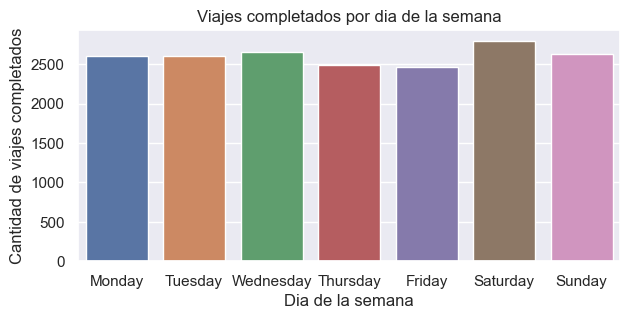

In [1580]:
# grafico de viajes completados por dia de la semana

sns.set(rc={'figure.figsize':(7,3)})

sns.countplot(x='day_of_week', data=df_trips_day_completed, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.title('Viajes completados por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de viajes completados')
plt.show()



#### 2) Which hour of the day generates the most revenue? 
#### 2) ¿Qué hora del día genera más ingresos?

<AxesSubplot: xlabel='trip_rev'>

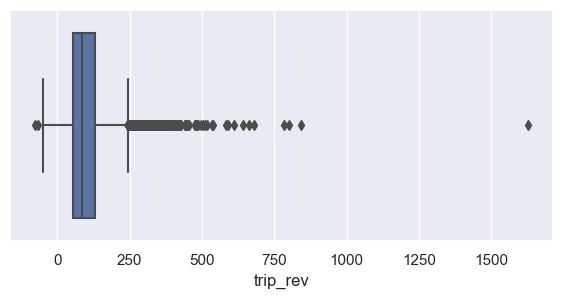

In [1581]:
# Buscamos outliers en la columna revenue

sns.boxplot(x=df_trips_day['trip_rev'])


In [1582]:
# Porcentaje de outliers en la columna revenue

df_trips_day[df_trips_day['trip_rev'] > 750]['trip_rev'].count()/df_trips_day['trip_rev'].count()*100



0.02117634602149399

In [1583]:
# No parece significativos los outliers, por lo que los dejamos. 

# Cantidad de ganancias por hora del dia con indice por hora

reve_by_hour = df_trips_day.groupby('hour')['trip_rev'].sum().sort_values(ascending=False)
reve_by_hour



hour
17    93066.20
21    88358.05
20    86388.81
23    85504.48
18    84438.21
22    83886.19
5     82330.40
15    82003.86
16    81920.10
14    81627.18
13    81443.23
19    80748.67
11    79882.07
3     76598.14
12    76512.34
6     74250.66
9     73520.06
7     72410.69
4     71772.02
10    67921.53
8     67392.22
0     64020.58
2     63512.41
1     62229.94
Name: trip_rev, dtype: float64

In [1584]:
# sacamos la media de ganancias por hora del dia y ordenamos por hora del dia

reve_by_hour_mean = reve_by_hour/365
reve_by_hour_mean

hour
17    254.975890
21    242.076849
20    236.681671
23    234.258849
18    231.337562
22    229.825178
5     225.562740
15    224.668110
16    224.438630
14    223.636110
13    223.132137
19    221.229233
11    218.854986
3     209.857918
12    209.622849
6     203.426466
9     201.424822
7     198.385452
4     196.635671
10    186.086384
8     184.636219
0     175.398849
2     174.006603
1     170.492986
Name: trip_rev, dtype: float64

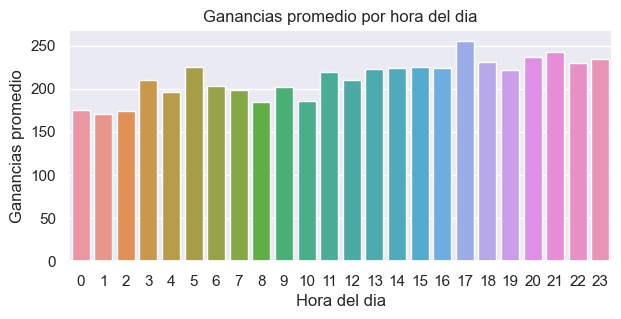

In [1585]:
# grafico de ganancias promedio por hora del dia

sns.set(rc={'figure.figsize':(7,3)})
sns.barplot(x=reve_by_hour_mean.index, y=reve_by_hour_mean.values)


plt.title('Ganancias promedio por hora del dia')
plt.xlabel('Hora del dia')
plt.ylabel('Ganancias promedio')

plt.show()


#### Hacemos un grafico de lineas y barras mostrando viajes por hora completados y revenue por hora de los viajes completados.


In [1586]:
df_trips_day_completed_hour = df_trips[['hour','trip_rev','trip_status']]

df_trips_day_completed_hour.isnull().sum()

df_trips_day_completed_hour = df_trips_day_completed_hour[df_trips_day_completed_hour['trip_status'] == 'completed']

df_trips_day_completed_hour.isnull().sum()

hour           0
trip_rev       0
trip_status    0
dtype: int64

In [1587]:
# Grafico superponiendo ganancias y viajes completados por hora del dia

# creamos el dataset con las columnas que nos interesan, en este caso "hour", "trip_rev" y "trip_status".

df_trips_day_completed_hour = df_trips[['hour','trip_rev','trip_status']]

# agrupamos por hora y sumamos las ganancias y status

df_trips_day_completed_hour = df_trips_day_completed_hour.groupby('hour').agg({'trip_rev':'sum','trip_status':'count'})

# creamos una nueva columna con el promedio de ganancias por hora del dia

df_trips_day_completed_hour['trip_rev_mean'] = df_trips_day_completed_hour['trip_rev']/365

# creamos una nueva columna con el de viajes con ganancia por hora del dia

df_trips_day_completed_hour['trip_status_mean'] = df_trips_day_completed_hour['trip_status']/365

df_trips_day_completed_hour

,trip_rev,trip_status,trip_rev_mean,trip_status_mean
hour,,,,
0,64020.58,843,175.398849,2.309589
1,62229.94,808,170.492986,2.213699
2,63512.41,795,174.006603,2.178082
3,76598.14,884,209.857918,2.421918
4,71772.02,758,196.635671,2.076712
5,82330.40,865,225.562740,2.369863
6,74250.66,750,203.426466,2.054795
7,72410.69,845,198.385452,2.315068
8,67392.22,780,184.636219,2.136986


### Graficamos

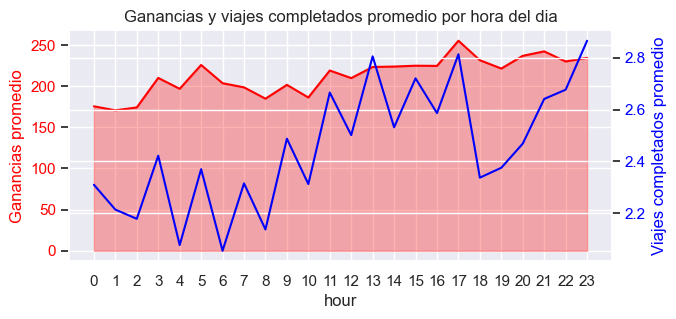

In [1588]:
# Generamos un grafico de doble eje para comparar ganancias y viajes completados por hora del dia

# Ganancias promedio por hora del dia
grafico = sns.lineplot(data=df_trips_day_completed_hour, x=df_trips_day_completed_hour.index, y='trip_rev_mean', color='red')
grafico.set_ylabel('Ganancias promedio', color='red')
grafico.tick_params(axis='y', labelcolor='red')

# agregamos sombra a la zona de ganancias promedio

grafico.fill_between(df_trips_day_completed_hour.index, df_trips_day_completed_hour['trip_rev_mean'], alpha=0.3, color='red')


# Viajes completados promedio por hora del dia
grafico2 = grafico.twinx()
sns.lineplot(data=df_trips_day_completed_hour, x=df_trips_day_completed_hour.index, y='trip_status_mean', color='blue', ax=grafico2)
grafico2.set_ylabel('Viajes completados promedio', color='blue')
grafico2.tick_params(axis='y', labelcolor='blue')


# agregamos todas las horas del dia al grafico

grafico.set_xticks(df_trips_day_completed_hour.index)


plt.title('Ganancias y viajes completados promedio por hora del dia')

plt.show()

#### 3) For the driver ID: 673 determine the mean time between trips (from one trip’s drop_datetime, to the next trip’s request_datetime).
#### 3) Para el ID del conductor: 673 determine el tiempo medio entre viajes (desde el drop_datetime de un viaje, hasta el request_datetime del siguiente viaje).

Para obtner con precision el tiempo entre viajes debemos identificar los viajes realizados cada dia o cada turno del conductor para no obtener datos erroneos como tiempos entre viajes de mas de 24 horas. Otro factor a tener en cuenta es que el conductor puede tener una request de viaje durante la realizacion de otro viaje por lo que en ese caso no hay tiempo de espera. 

In [1589]:
# Creamos un dataframe con los datos del conductor 673 para poder analizarlos

driver_673 = df_trips[df_trips['id_driver'] == 673]

driver_673 = driver_673[['id_driver','request_datetime','drop_datetime']]


# pasamos las columnas dropoff_datetime y request_datetime a formato datetime

driver_673['drop_datetime'] = pd.to_datetime(driver_673['drop_datetime'])
driver_673['request_datetime'] = pd.to_datetime(driver_673['request_datetime'])

# Ordenamos el dataframe por fecha de request_datetime

driver_673 = driver_673.sort_values(by='request_datetime')

# reset index

driver_673 = driver_673.reset_index(drop=True)


# creamos una columna con la diferencia de tiempo entre el viaje anterior y el actual solo si el viaje es del mismo dia

driver_673['diff_time'] = driver_673['request_datetime'].shift(-1) -driver_673['drop_datetime']

for i in range(len(driver_673['diff_time'])):
    
    # if dropoff_datetime is in the same day as the next request_datetime then we calculate the difference in time
    if i != len(driver_673['diff_time'])-1:
        if (driver_673['drop_datetime'][i].date() == driver_673['request_datetime'][i+1].date()):
           if (driver_673['diff_time'][i].days == -1):
                driver_673['diff_time'][i] = pd.NaT
        else:
            driver_673['diff_time'][i] = pd.NaT
    else:
        driver_673['diff_time'][i] = pd.NaT  


driver_673.head(10)
# veo el drop time del indice 2



,id_driver,request_datetime,drop_datetime,diff_time
0,673,2022-08-22 05:10:00,2022-08-22 05:31:00,NaT
1,673,2022-08-22 05:25:00,2022-08-22 05:55:00,0 days 00:05:00
2,673,2022-08-22 06:00:00,2022-08-22 06:22:00,0 days 00:08:00
3,673,2022-08-22 06:30:00,2022-08-22 06:58:00,0 days 00:09:00
4,673,2022-08-22 07:07:00,2022-08-22 07:56:00,NaT
5,673,2022-08-22 07:52:00,2022-08-22 08:32:00,NaT
6,673,2022-08-22 08:29:00,2022-08-22 08:59:00,NaT
7,673,2022-08-22 08:52:00,2022-08-22 09:35:00,0 days 00:12:00
8,673,2022-08-22 09:47:00,2022-08-22 10:08:00,0 days 00:07:00
9,673,2022-08-22 10:15:00,2022-08-22 10:37:00,NaT


In [1590]:
driver_673.describe()

,id_driver,diff_time
count,75.0,30
mean,673.0,0 days 00:09:16
std,0.0,0 days 00:09:33.757127519
min,673.0,0 days 00:00:00
25%,673.0,0 days 00:01:15
50%,673.0,0 days 00:07:00
75%,673.0,0 days 00:13:30
max,673.0,0 days 00:37:00


In [1591]:
# Total tiempo de espera entre viajes del conductor 673

print(f"El total de tiempo de espera entre viajes del conductor 673 es de: {driver_673['diff_time'].sum()}")


# promedio
print(f"El promedio de espera entre viajes del conducto 673 es de: {driver_673['diff_time'].mean()}")

El total de tiempo de espera entre viajes del conductor 673 es de: 0 days 04:38:00
El promedio de espera entre viajes del conducto 673 es de: 0 days 00:09:16


#### 4) If you had to fire one driver, who would it be? Indicate the Id_driver and the reasons that support your decision.
#### 4) Si tuvieras que despedir a un conductor, ¿quién sería? Indique el Id_driver y las razones que respaldan su decisión.

Analizo las variables que influyen en el rendimiento de los conductores, como cantidad de viajes, revenue, tiempo entre viajes, etc.

In [1592]:
#Creamos un dataframe de conductores sumando revenue, tiempo de espera entre viajes, cantidad de viajes completados y cantidad de viajes cancelados por conductor
df_trips['drop_datetime'] = pd.to_datetime(df_trips['drop_datetime'])
df_trips['request_datetime'] = pd.to_datetime(df_trips['request_datetime'])

df_trips['driver_canceled'] = df_trips['trip_status'].apply(lambda x: 1 if x == 'driver_cancelled' else 0)
df_trips['completed'] = df_trips['trip_status'].apply(lambda x: 1 if x == 'completed' else 0)

# Promedio de revenue por viaje

df_drivers['trip_rev_mean'] = df_trips['trip_rev']/df_trips['completed']



df_drivers = df_trips.groupby('id_driver').agg({'trip_rev':'sum','completed':'sum','driver_canceled':'sum', 'trips_per_hour':'mean'})
df_drivers['trip_rev_mean'] = df_drivers['trip_rev']/df_drivers['completed']
df_drivers



,trip_rev,completed,driver_canceled,trips_per_hour,trip_rev_mean
id_driver,,,,,
6,6210.09,56,1,1.903095,110.894464
12,4902.45,48,2,1.663235,102.134375
22,4929.61,54,1,1.905580,91.289074
26,5754.06,76,3,2.297025,75.711316
31,6098.73,55,3,1.702420,110.886000
...,...,...,...,...,...
976,4858.91,42,0,1.632537,115.688333
977,4159.95,39,0,1.771220,106.665385
978,2648.22,25,0,1.711082,105.928800


In [1593]:
# sacamos el promedio de espera entre viajes para cada conductor.

df_drivers_time_between_trips = pd.DataFrame(columns=['id_driver','diff'])

for id_driver in df_trips['id_driver'].unique():
    driver = df_trips[df_trips['id_driver'] == id_driver]
    driver = driver.sort_values(by='request_datetime')
    driver['diff'] = driver['request_datetime'].shift(-1) - driver['drop_datetime']
    for i in range(len(driver['diff'])):
        if i != len(driver['diff'])-1:
            if (driver['drop_datetime'].iloc[i].date() == driver['request_datetime'].iloc[i+1].date()):
                if (driver['diff'].iloc[i].days == -1):
                    driver['diff'].iloc[i] = pd.NaT
            else:
                driver['diff'].iloc[i] = pd.NaT
        else:
            driver['diff'].iloc[i] = pd.NaT
    df_drivers.loc[id_driver,'diff'] = driver['diff'].mean()
    df_drivers_time_between_trips.loc[id_driver,'id_driver'] = id_driver
    df_drivers_time_between_trips.loc[id_driver,'diff'] = driver['diff'].mean()

# ordenamos el dataframe por el promedio de espera entre viajes

df_drivers_time_between_trips = df_drivers_time_between_trips.sort_values(by='diff')
df_drivers_time_between_trips


df_drivers_time_between_trips[df_drivers_time_between_trips['id_driver'] == 673]

,id_driver,diff
673,673,0 days 00:09:16


In [1594]:
# Unimos los dataframes df_drivers y df_drivers_time_between_trips para tener toda la informacion de los conductores en un solo dataframe, agregando el promedio de espera entre viajes

df_drivers = df_drivers.merge(df_drivers_time_between_trips, on='id_driver')

df_drivers.drop(columns='diff_x', inplace=True)

df_drivers.rename(columns={'diff_y':'time_between_trips'}, inplace=True)

# reseteamos el indice

df_drivers.reset_index(inplace=True)

df_drivers

# buscamos el conductor 673

df_drivers[df_drivers['id_driver'] == 673]

,index,id_driver,trip_rev,completed,driver_canceled,trips_per_hour,trip_rev_mean,time_between_trips
143,143,673,5313.08,65,1,1.991968,81.739692,0 days 00:09:16


In [1601]:
# Sacamos el ratio de exito de viajes

df_drivers['success_ratio'] = df_drivers['completed']/(df_drivers['completed'] + df_drivers['driver_canceled'])

# ordenamos por menor ratio de exito

df_drivers = df_drivers.sort_values(by='success_ratio')



df_drivers.head(10)


# df_drivers[df_drivers['id_driver'] == 789]

,index,id_driver,trip_rev,completed,driver_canceled,trips_per_hour,trip_rev_mean,time_between_trips,success_ratio
206,206,789,2827.71,30,4,1.247760,94.257000,0 days 04:15:23.076923076,0.882353
358,358,975,1048.31,8,1,1.295591,131.038750,0 days 00:16:40,0.888889
95,95,559,4797.98,43,5,1.413070,111.580930,0 days 00:14:09,0.895833
205,205,785,2103.50,18,2,1.533157,116.861111,0 days 02:23:22.500000,0.900000
338,338,954,890.99,9,1,1.298303,98.998889,0 days 00:10:15,0.900000
21,21,173,4950.21,50,5,1.519878,99.004200,0 days 00:06:50.769230769,0.909091
175,175,728,4244.50,31,3,1.331938,136.919355,0 days 00:13:47.142857142,0.911765
127,127,633,4594.39,44,4,1.493495,104.417955,0 days 03:11:31.764705882,0.916667
341,341,957,2680.32,23,2,1.511845,116.535652,0 days 01:50:13.333333333,0.920000
103,103,573,4866.36,61,5,1.772284,79.776393,0 days 00:08:40.714285714,0.924242


### Graficamos para poder observar mejor los peores 10 desempeños

Text(0.5, 1.0, 'Viajes completados y cancelados por conductor y ratio de exito')

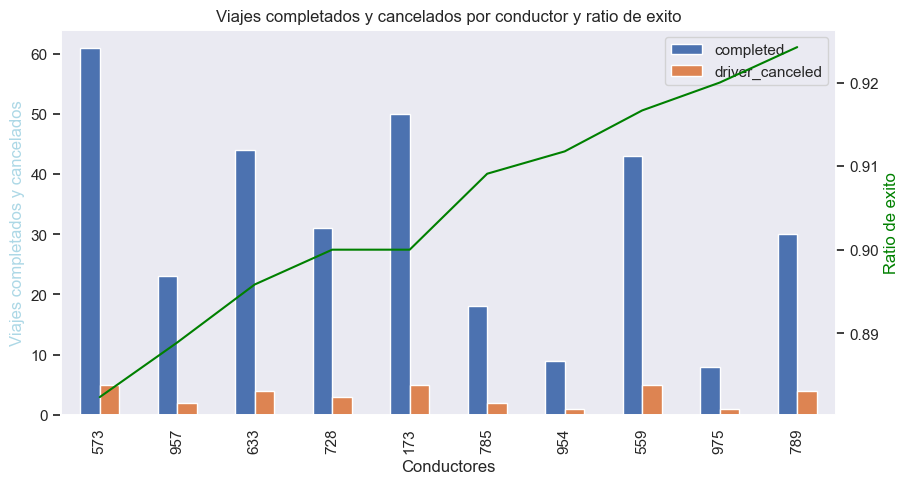

In [1607]:
# generamos un grafico de doble eje con el ratio de exito y los viajes completados y cancelados de los 10 peores conductores usando seaborn

df_drivers_worst = df_drivers.head(10)
# paso id_driver a string para que no me lo tome como una variable numerica
df_drivers_worst['id_driver'] = df_drivers_worst['id_driver'].astype(str)


# grafico de barras de cancelados y completados

grafico_1 = df_drivers_10_worst.plot(x='id_driver', y=['completed','driver_canceled'], kind='bar', figsize=(10,5), title='10 peores conductores con viajes completados y cancelados')


# grafico de linea de ratio de exito

grafico_3 = grafico_1.twinx()
sns.lineplot(x=df_drivers_worst['id_driver'], y=df_drivers_worst['success_ratio'], color='green', ax=grafico_3)







# remuevo grilla

grafico_1.grid(False)
grafico_3.grid(False)

# agrego leyendas

grafico_3.set_ylabel('Ratio de exito', color='green')

grafico_1.set_xlabel('Conductores')

grafico_1.set_ylabel('Viajes completados y cancelados', color='lightblue')

grafico_1.set_title('Viajes completados y cancelados por conductor y ratio de exito')

# agrego valores de ratio a los puntos del grafico

